In [ ]:
# Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from sklearn.feature_selection import mutual_info_classif

# Load, display, first columns

In [6]:
# Load the dataset
leads = pd.read_csv("Leads.csv")


In [9]:
# Display the first few rows
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
# Get information about columns and their data types
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data preparation and data cleaning

In [12]:
# Handle 'Select' values by replacing them with NaN
leads.replace('Select', np.nan, inplace=True)

# Drop columns with a high percentage of missing values (more than 30%)
missing_percentage = leads.isnull().sum() / len(leads) * 100
cols_to_drop = missing_percentage[missing_percentage > 30].index
leads.drop(cols_to_drop, axis=1, inplace=True)

# Impute missing values in numerical columns with the median
numerical_cols = leads.select_dtypes(include=np.number).columns
for col in numerical_cols:
    # Use .loc to avoid the warning
    leads.loc[:, col] = leads[col].fillna(leads[col].median())

# Impute missing values in categorical columns with the mode
categorical_cols = leads.select_dtypes(include=object).columns
for col in categorical_cols:
    # Use .loc to avoid the warning
    leads.loc[:, col] = leads[col].fillna(leads[col].mode()[0])

# Verify if there are any remaining missing values
print("Missing values after imputation:", leads.isnull().sum().sum())

Missing values after imputation: 0


# EDA, feature importance analysis

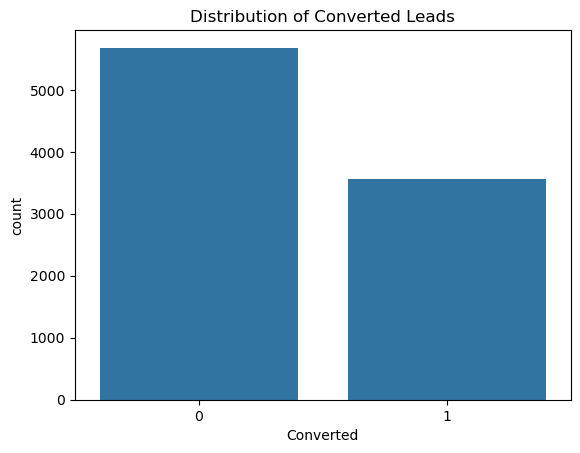

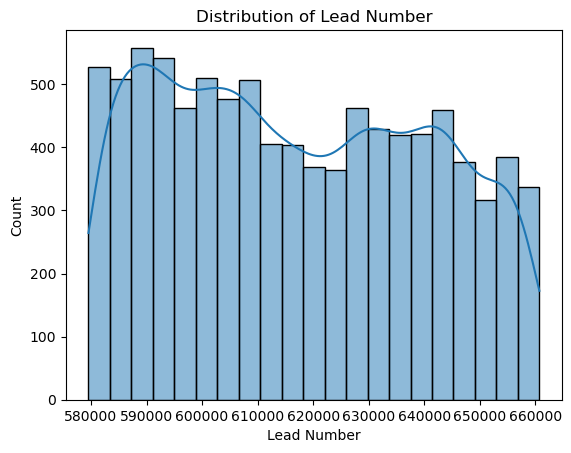

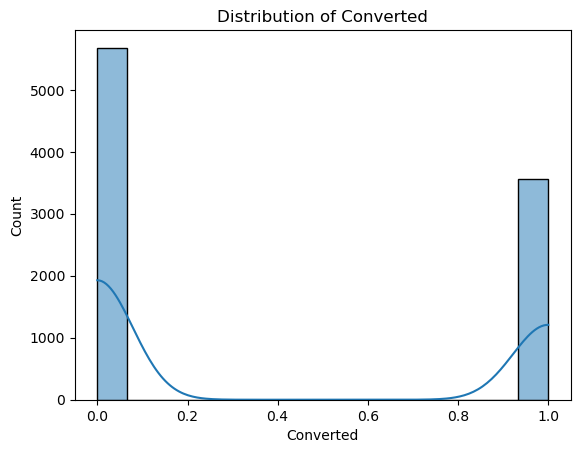

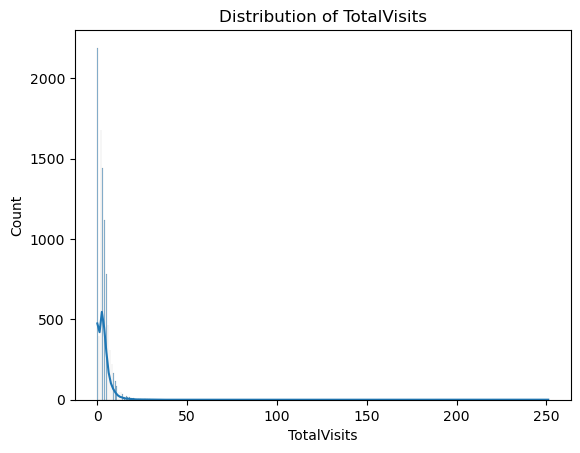

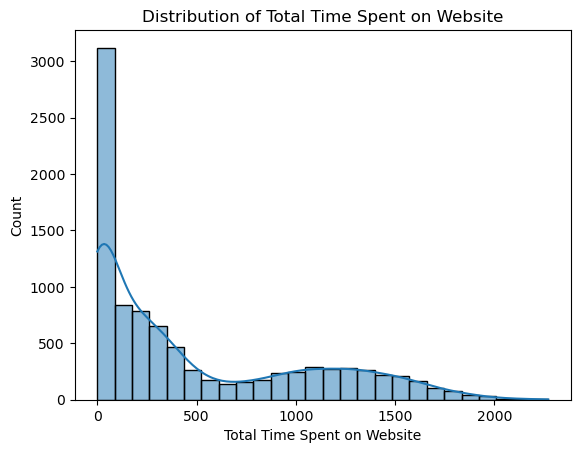

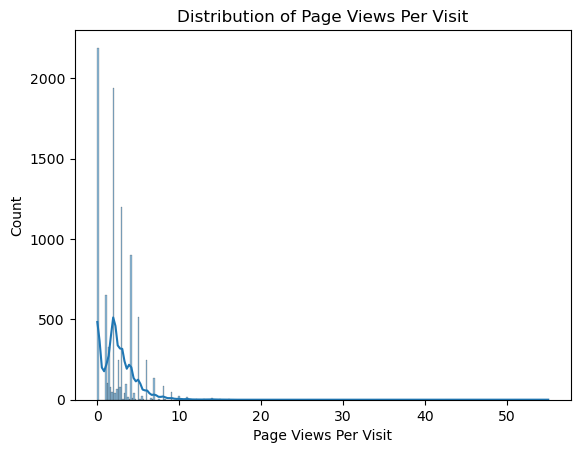

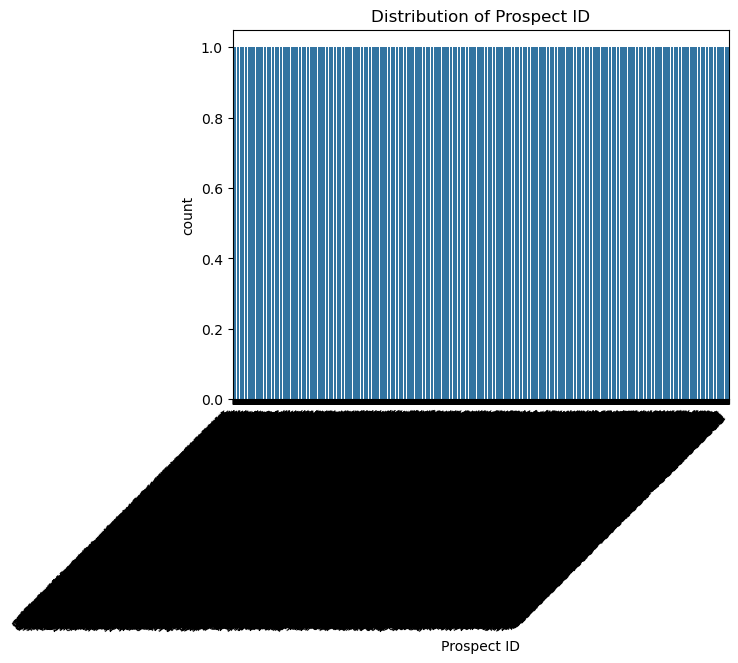

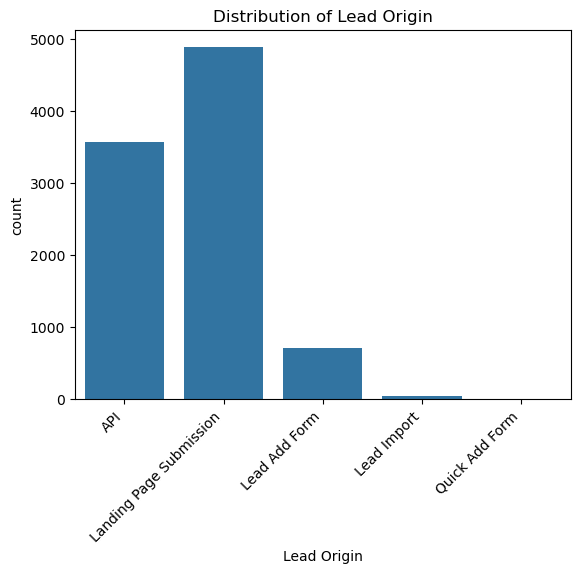

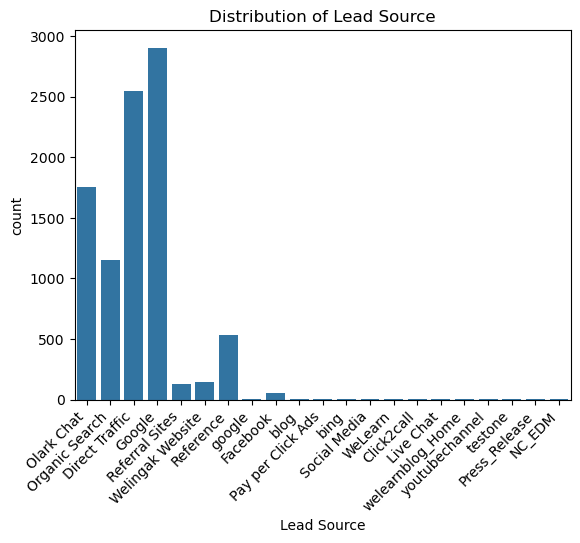

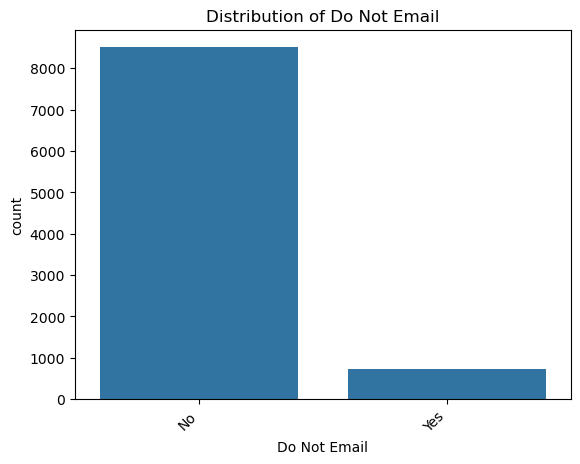

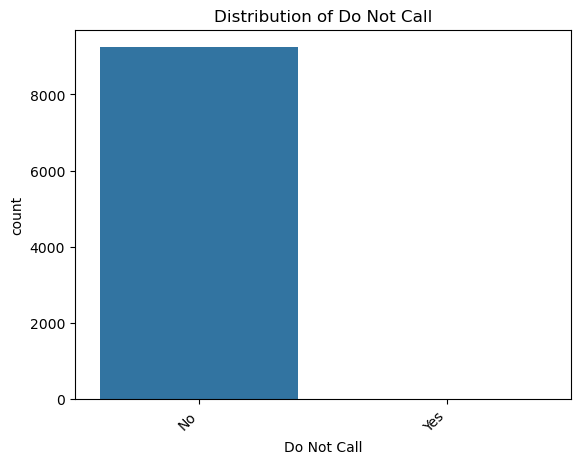

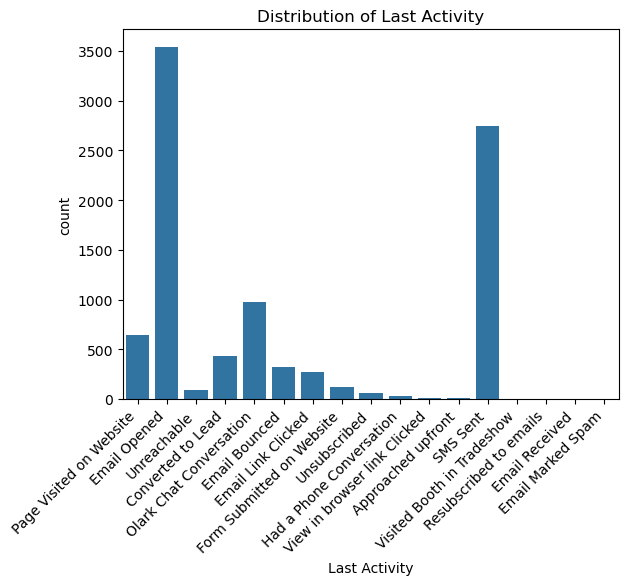

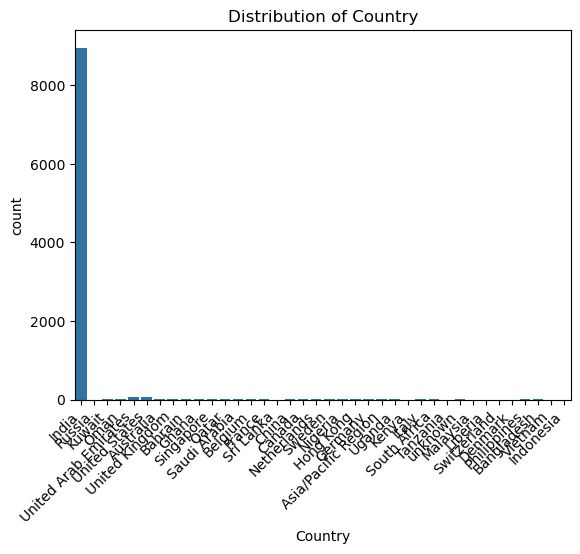

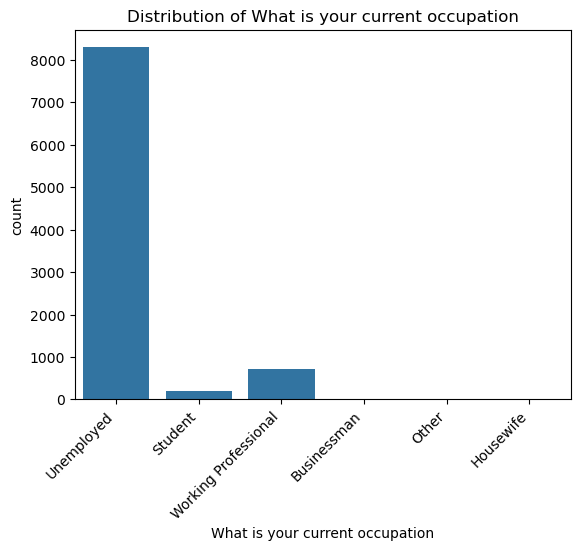

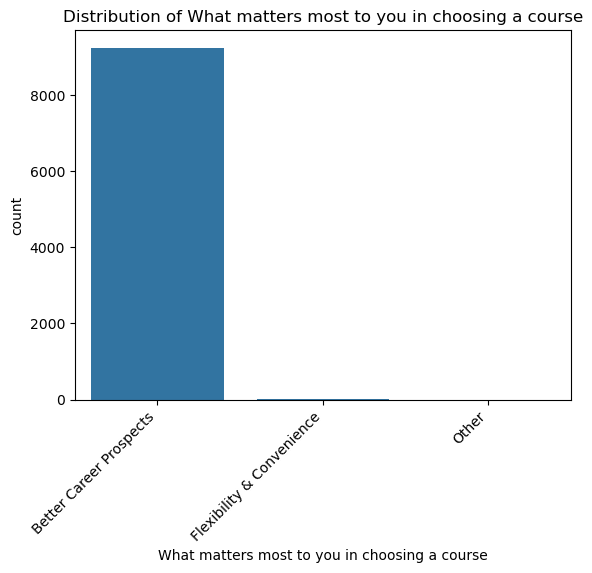

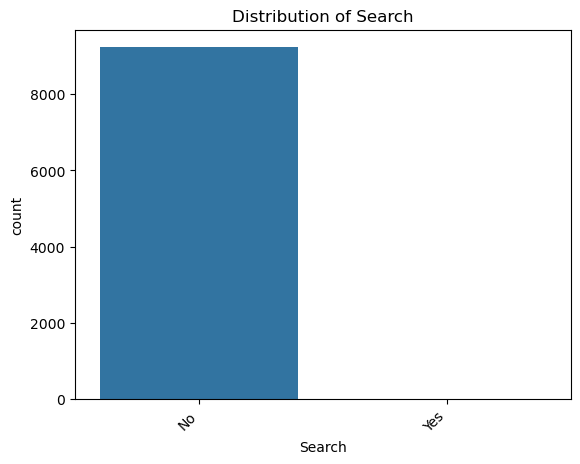

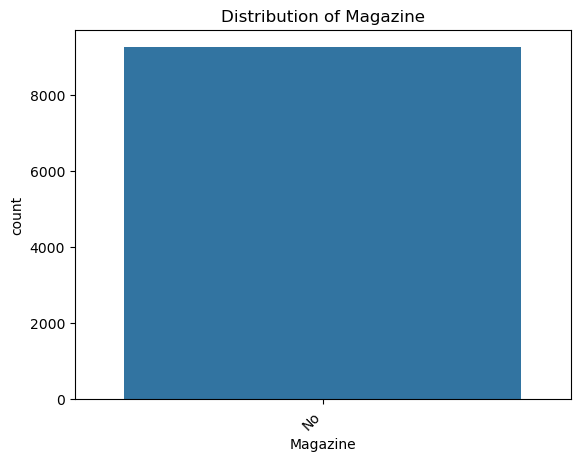

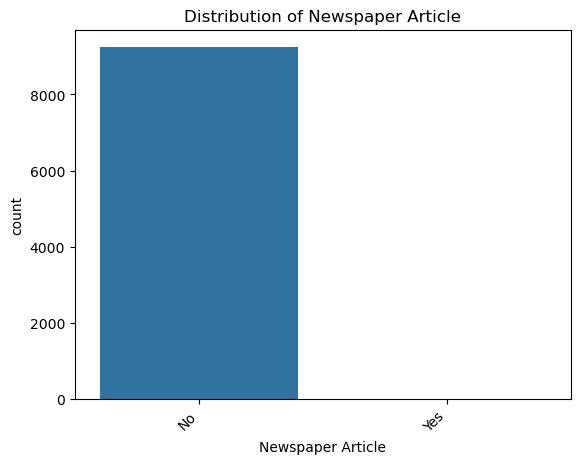

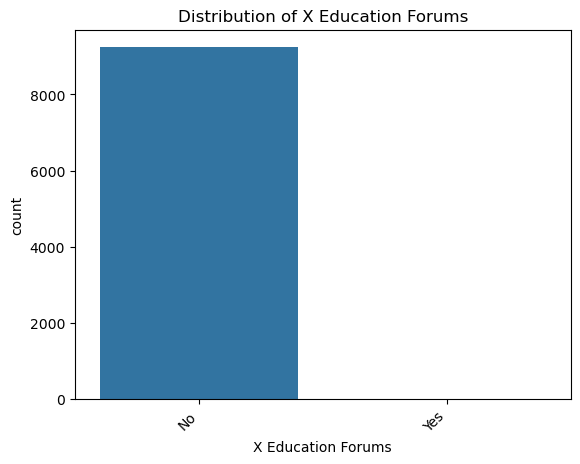

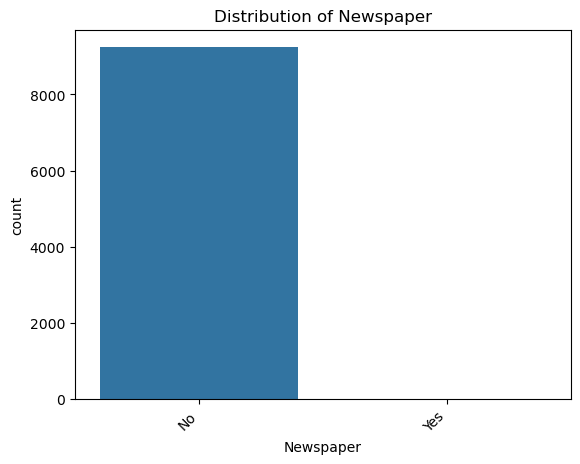

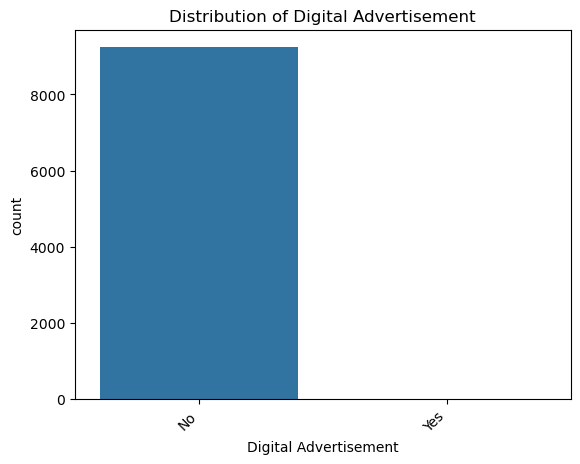

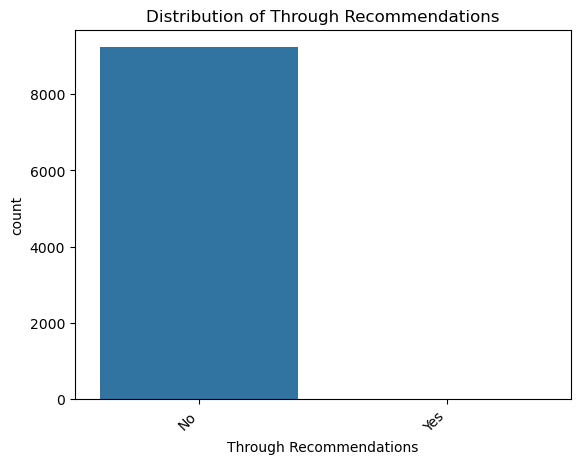

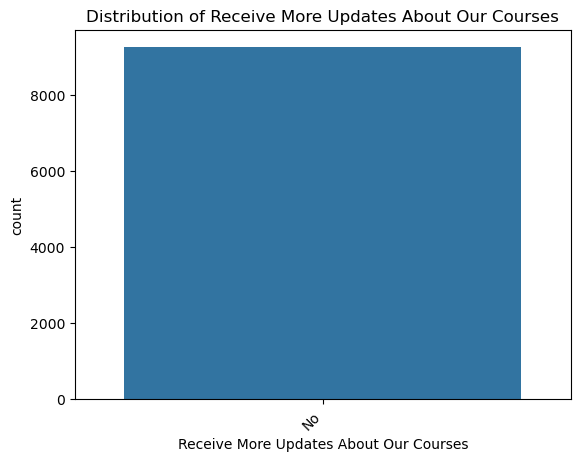

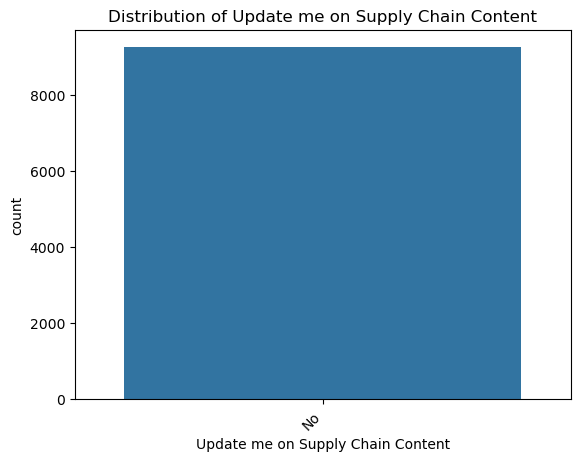

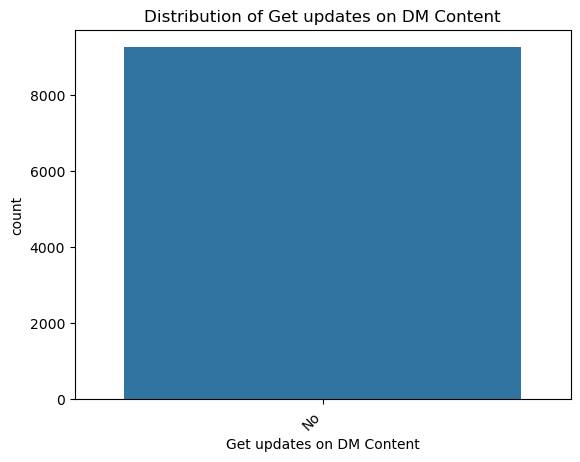

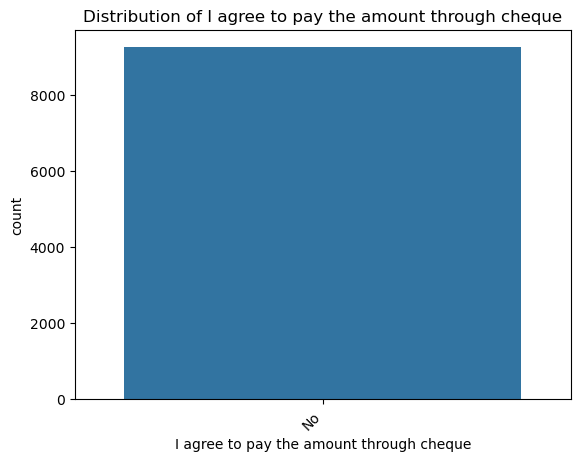

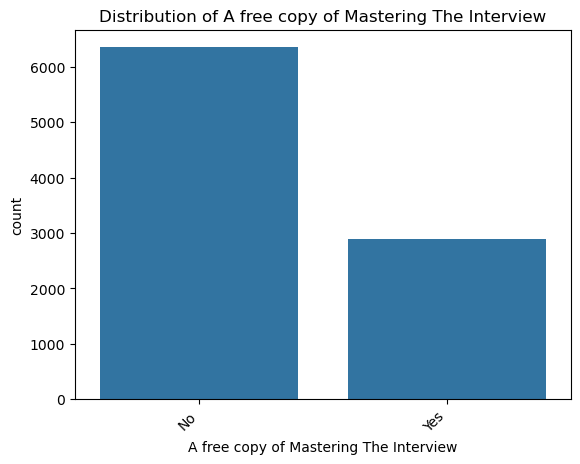

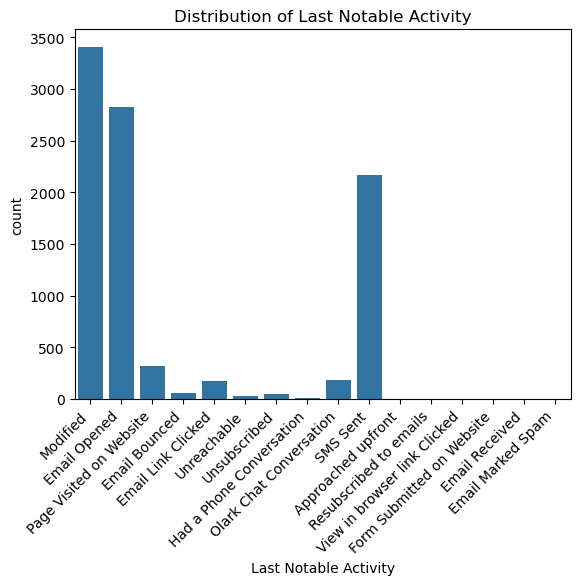

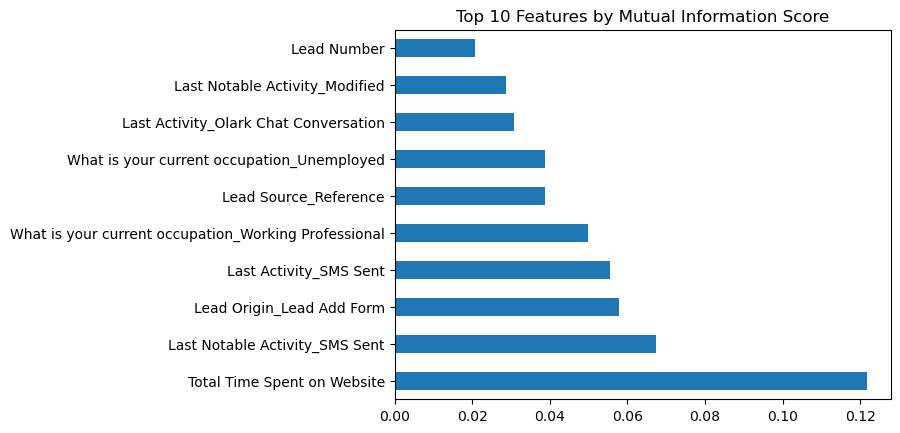

In [13]:
# --- Exploratory Data Analysis (EDA) ---

# Visualize the distribution of the target variable
sns.countplot(x='Converted', data=leads)
plt.title('Distribution of Converted Leads')
plt.show()

# Visualize numerical features
for col in numerical_cols:
    sns.histplot(leads[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualize categorical features
for col in categorical_cols:
    sns.countplot(x=col, data=leads)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# --- Feature Importance Analysis ---

# Encode categorical variables for feature importance analysis
leads_encoded = pd.get_dummies(leads, columns=categorical_cols, drop_first=True)

# Separate features and target variable
X = leads_encoded.drop('Converted', axis=1)
y = leads_encoded['Converted']

# Calculate mutual information scores
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

# Plot the top 10 features
mi_scores.head(10).plot(kind='barh')
plt.title('Top 10 Features by Mutual Information Score')
plt.show()

# Model selection process and parameter tuning

/root/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


AUC Score: 0.8921


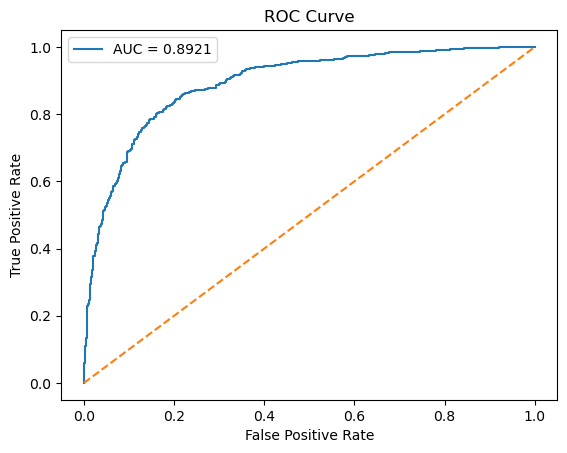

Optimal Threshold for 80% Conversion Rate: 0.3451
Accuracy: 0.8166


In [14]:
# --- Model Selection and Parameter Tuning ---

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f'AUC Score: {auc_score:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Find the optimal threshold for the desired conversion rate (e.g., 80%)
target_conversion_rate = 0.8
optimal_idx = np.argmax(tpr * (1 - fpr))
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal Threshold for {target_conversion_rate*100:.0f}% Conversion Rate: {optimal_threshold:.4f}')

# Predict classes using the optimal threshold
y_pred = (y_pred_proba >= optimal_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')